# Student name: Sajin Mohamed Pallikkathodi Erathali

# Student ID: 23037601

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import math
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Task 1
### Purpose: 
To check your understanding of key terms used throughout this module.

## Answer

Provide your answer in this cell..
<span style = "color:green">  
When a perceptron is used to categorize/classify two items according to their weight and circumference, the input space is composed of pairs representing these attributes. In order to classify these examples into two distinct classes, the perceptron uses a hypothesis set of linear functions and tries to learn a linear decision boundary with the given input space. The perceptron is aimed at generating an approximation of the unknown target function, which describes the function using which the given data is plotted/represented.</span>   

<span style = "color:green">  
In order to estimate this unknown target function, the perceptron makes use of the data set with the weight and circumference of the object. The perceptron, then adjusts its weights corresponding to the input features, such as weight and circumference, in order to minimize the error measure ie. the difference between the predicted result for the class that is attributed to an object with a given weight and circumference and the actual class that is representative of the object, by taking the difference between the predicted output and actual output.  </span>   

<span style = "color:green">  The perceptron works with concept of a threshold, combined with the weighted sum of input features(weight and circumference) to determine the final output space. If the weighted sum of input feature exceeds a threshold, then it classifies the object as one class and otherwise the other class. </span>  


<span style = "color:green">  The final hypothesis serves as the linear decision boundary that separates the two classes with least in-sample error and out-of-sample error. thereby generalizing well with the out-of-sample data. The perceptron does this by iteratively adjusting the weights of the parameters namely, weight and circumference of the object</span>  

# Task 2
Learning curves allow us to look at the impact that the size of the training data set N has on the ability to keep the difference between $E_{in}$ and $E_{out}$ small.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_errors = 1- train_scores
    test_errors = 1-test_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")

    
    plt.legend(loc="best")
    return plt

In [6]:
data = np.loadtxt("Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [7]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

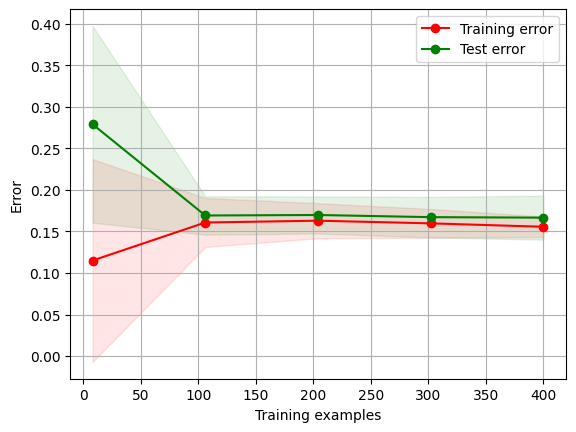

In [8]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Neural net learning curves

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

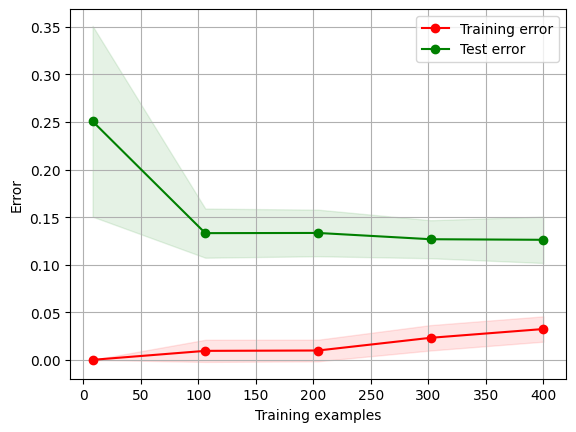

In [9]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Describe and Explain
Describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

### Answer


Provide your answer in this cell..  
<span style = "color:green">  
$E_{in}$ denotes the error from the known data, ie the sample space provided.
and  
$E_{out}$ denotes the error from the entire data set inclusive of future data ie. the error from data that we need to fit(unknown data).</span>  

Why the training error is (generally) lower than the test error?  
<span style="color:green">The training error is generally lower than the test error due to the fact that while training the model learns the patterns in the data provided(training data) and tries to fit the hypothesis that matches this data, thereby overfitting the model(fitting the model to noise data) to the train data. When the test data comes in, this is new data that the model has not seen, due to which the error would increase. This causes the training error to be lower than test error.</span>  

Why it is possible for the training error to be higher than the test error?  
<span style="color:green">It is possible for test error to be lower than train error when there is strong regularization which prevents overfitting to the training data, there by generalizing better to test data. Regularization is a way we can introduce a penalty to complex model and tries to not overfit or underfit the data, thereby enabling better generalization. Another possibility where test error is lower than training error is when the training data does not accurately represent the problem at hand an the test set is better able to represent the model's assumptions</span>  

Why the training error increases as the number of training samples is increased?  
<span style="color:green">The training error increases with the number of training examples due to overfitting as the model fits to training data closely and results in poor generalization. And with the increase in model complexity the model fits closely to noise data thereby increasing the training error.</span>  

Which of the two models is the more complex model?  
<span style="color:green">Considering the fact that the MLPClassifier has 2 hidden layers with 200 neurons in the first layer and another 4 neurons in the second layer and is able to represent complex data due to above mentioned layers, and the logistic Regression is a simple model without any hidden layer or multiple neurons and is inherently a linear classifier, the MLPClassifier would be more complex as it can classify non linear data as well.</span>  


# Task 3

## Provided functions

Below functions implement linear regression in a closed form (one-step solution using the pseudo-inverse).

In [56]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [57]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 3a

### Answer

### Defining Mean Square Error


$E(w) = \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})^2$

In [346]:
def calc_error(w,X,y):
    # implement your error function for linear regression here
    # adding bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # actual - predicted
    return np.mean((y - X.dot(w))**2)

You may add as many cells below as you require.

##### Plotting the regression line using the data and the cells provided above and defining the regression line
##### Output of the cells contains the equation of regression line using the weights and bias generated

weights[bias, weights associated with input] are  [0.38728396 0.49338411]
Regression line: y = 0.4933841135775688*x + 0.38728395882553257
Error: 0.004444774249517789


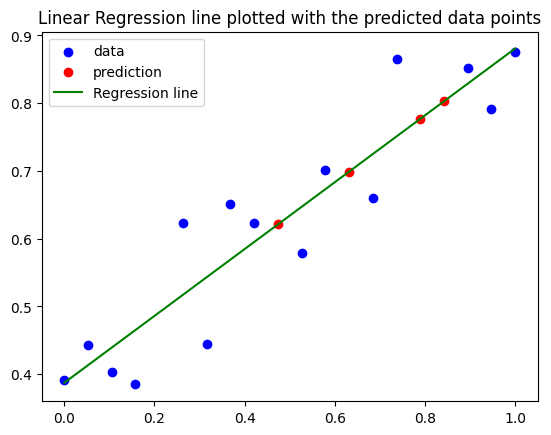

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Et1_Task3a.csv', header=0)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w = linreg_weights(X_train,y_train)
y_pred = linreg_predict(w,X_test)

print("weights[bias, weights associated with input] are ",w)

print(f"Regression line: y = {w[1]}*x + {w[0]}" )

# plot the training data
plt.scatter(X_train, y_train, color='blue', label = 'data')
# prediction on the test data
plt.scatter(X_test, y_pred, color='red', label = 'prediction')

# geneerate 100 evenly spaced points between the minimum and maximum values of X_train
regression_x_line = np.linspace(min(X_train), max(X_train), 100)

# calculate the regression line using the formula y = w[1]*x + w[0]
regression_y_line = w[0] + w[1]*regression_x_line
# plot regression line
plt.plot(regression_x_line, regression_y_line, color='green', label = 'Regression line')
plt.title("Linear Regression line plotted with the predicted data points")
plt.legend()


# Quantifying the error with the error function you have created.
mse_error = calc_error(w,X_test,y_test)
print(f"Error: {mse_error}")

In [91]:

# to find the point that adds the biggest error we need to find the distance between the regression line and the point
def find_biggest_error_point():
    # here we are using the predict function on all the points to form the regression line inorder to determine the point that adds the biggest error
    y_pred = linreg_predict(w,X) 
    distance = np.abs(y - y_pred)  # the distance between the regression line and the point

    # finding the index of the point at which maximum distance from the regrssion line is observed
    max_distance_index = np.argmax(distance)
    print(f"The maximum distance is ", distance[max_distance_index], 
          f"caused by the point in the input data set with x value of {X[max_distance_index]} and y value of {y[max_distance_index]}")

    plt.scatter(X, y, color='blue', label = 'data')
    plt.scatter(X[max_distance_index], y[max_distance_index], color='red', label = 'max error point')
    plt.plot(X, y_pred, color='green', label = 'Regression line')
    plt.title("Linear Regression line plotted with the point that adds the biggest error")
    plt.legend()
    plt.show()


### Which data point adds the biggest error term to the optimised error function?

#### Plotting the regression line with the biggest error introducing point in the current dataset as red 

The maximum distance is  0.11494452284708523 caused by the point in the input data set with x value of [0.73684211] and y value of 0.8657746706245105


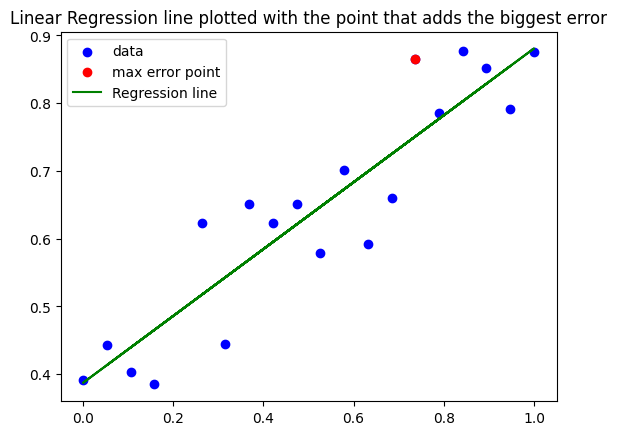

In [92]:
find_biggest_error_point()

<span style="color:green">The data point that adds the biggest error term is the one at (0.73684211,0.8657746706245105) which is shown above, due to this point being the farthest from the regression line</span>

### How do outliers effect linear regression and why?  
In new plots, add one data point to the dataset to illustrate how linear regression responds to outliers.


weights[bias, weights associated with input] are  [0.4407085  0.30536399]
Regression line: y = 0.3053639885935296*x + 0.4407085001602683
Error: 0.008607957288736328


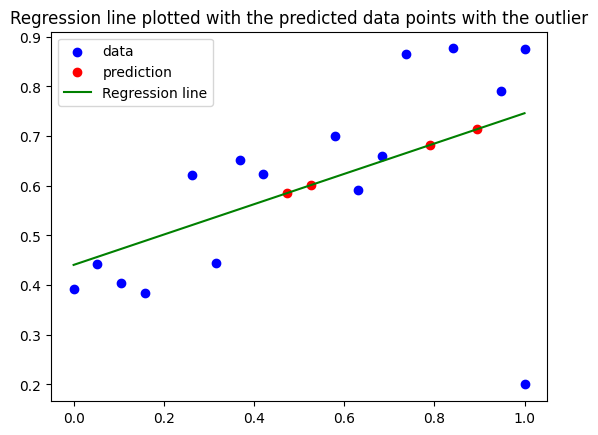

In [94]:


import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Et1_Task3a.csv', header=0)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# adding an outlier point at x = 1, y = 0.2
X = np.append(X, [[1]], axis=0)
y = np.append(y, 0.2)
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w = linreg_weights(X_train,y_train)
y_pred = linreg_predict(w,X_test)

print("weights[bias, weights associated with input] are ",w)

print(f"Regression line: y = {w[1]}*x + {w[0]}" )

# plot the training data
plt.scatter(X_train, y_train, color='blue', label = 'data')
# prediction on the test data
plt.scatter(X_test, y_pred, color='red', label = 'prediction')

# geneerate 100 evenly spaced points between the minimum and maximum values of X_train
regression_x_line = np.linspace(min(X_train), max(X_train), 100)

# calculate the regression line using the formula y = w[1]*x + w[0]
regression_y_line = w[0] + w[1]*regression_x_line
# plot regression line
plt.plot(regression_x_line, regression_y_line, color='green', label = 'Regression line')
plt.title("Regression line plotted with the predicted data points with the outlier")
plt.legend()

# Quantifying the error with the error function you have created.
mse_error = calc_error(w,X_test,y_test)
print(f"Error: {mse_error}")

<span style = "color:green">The slope and the intercept of the output regression line changes in favour of the newly added point(outlier), there by altering the error value to 0.008607957288736328 from 0.004444774249517789(without the outlier). This shows the outliers are a problem with linear regression as they alter the slope of the line and there by incorrectly forming a relationship between the input data sets(features), as the predicted values will be inclusive of the weight of the outlier. The slope and the intercept of the regression line changes to 0.3053639885935296 and 0.4407085001602683 from 0.4933841135775688 and 0.38728395882553257 respectively.</span>

### Finding the point causing the biggest error factor

The maximum distance is  0.546072488753798 caused by the point in the input data set with x value of [1.] and y value of 0.2


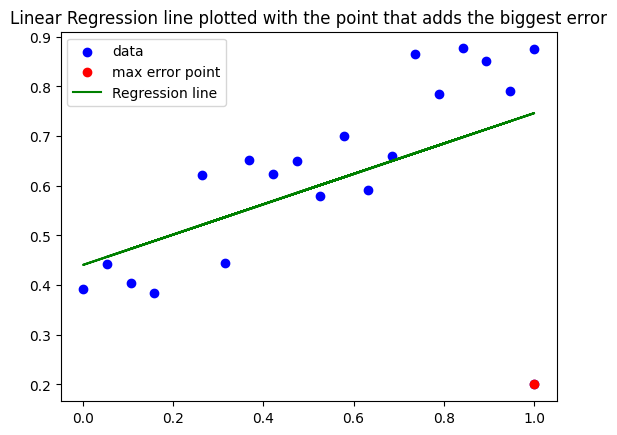

In [95]:
# observing the biggest error point has changed
find_biggest_error_point()

<span style="color:green">The above plot shows the change in the slope of the regression line and the change of the point causing the maximum error.</span>

##  Describe and Explain
Discuss your results and answer the following questions:
1. Which data point adds the biggest error term to the optimised error function?
2. How does the error contributed by this point relate to its distance from the regression line/function? 
3. How do outliers effect linear regression and why?
4. Under what circumstances will linear regression with a squared error measure be a good model?

Provide your answer in this cell..

1. Which data point adds the biggest error term to the optimised error function?  
<span style = "color:green">The biggest error term in the provided data set is due to the point (0.73684211,0.8657746706245105).</span> 

<span style = "color:green">However on addition of an outlier(a data point that significantly differs from the data) it changes to the added data point (1,0.2) as it brings the MSE to 0.008607957288736328 from 0.004444774249517789. This indicates a huge variation in the error measure due to the addition of this outlier</span>  
2. How does the error contributed by this point relate to its distance from the regression line/function?   
<span style = "color:green">As the distance of the point from the regression line increases, the error value also increase since its based on MSE. This would suggest a linear relationship between the distance of the point from the line adn the regression line.</span>  
3. How do outliers effect linear regression and why?  
<span style = "color:green">The outliers such as the newly added point at (1,0.2) changes the slope of the regression line hence the hypothesis that fits the data changes to a new hypothesis that also takes into consideration this new point. The new point also increases the error value as the error values is based on MSE. This would typically cause the model to overfit and thereby increase the out-of-sample error</span>  
4. Under what circumstances will linear regression with a squared error measure be a good model?  
<span style = "color:green">The linear regression with a squared error would be a good model when we have data the does not contain any outlier points and when the input data and the expected output has a linear relationship and when the number of train data is big enough to predict the output for test data accurately.</span>  

# Task 3b(Optional and Not Complete)

For regression the Mean Squared Error measure is a useful error measure. In this task we will explore how useful mean squared error is for classification. To this end:

- Use the provided code to classify the provided data using the linear classification algorithm
- Note that linear classification is implemented by putting the output of the linear regression model through the sign function

### Answer

In [369]:
def calc_class_error(w,X,y):
    # implement your error function for linear classification here
    # implement your error function for linear regression here
    # adding bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    
    return np.mean((y - X.dot(w))**2)

In [370]:
def sign(x, threshold):
    return np.where(x >= threshold, 1, -1)

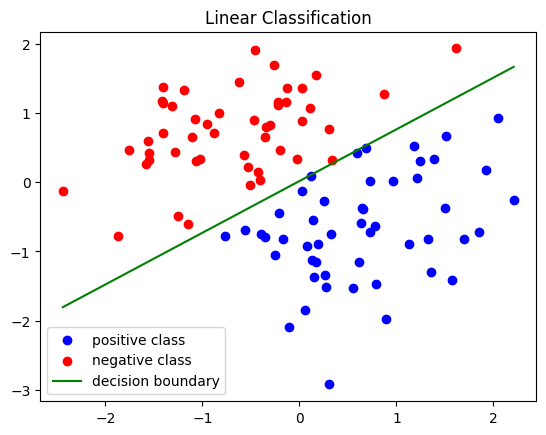

In [97]:
import numpy as np

def linclass_predict(w,X):
    # implement your linear classification algorithm here
    return sign(linreg_predict(w,X), 0)

df = pd.read_csv('Et1_Task3b.csv', header=0)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

w = linreg_weights(X,y)
predict = linclass_predict(w,X)

x_values = X[:, 0]  # select one feature for the x-axis
y_values = X[:, 1] 


plt.scatter(x_values[predict == 1], y_values[predict == 1], color='blue', label = 'positive class')
plt.scatter(x_values[predict == -1], y_values[predict == -1], color='red', label = 'negative class')
# plt.plot([-2,2],[-w[0]/w[2]+w[1]/w[2]*2,-w[0]/w[2]-w[1]/w[2]*2],'b',label="original data")
# Plot decision boundary
x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_values = -(w[0] + w[1]*x_values) / w[2]
plt.plot(x_values, y_values, 'g-', label='decision boundary')
plt.title("Linear Classification")

plt.legend()

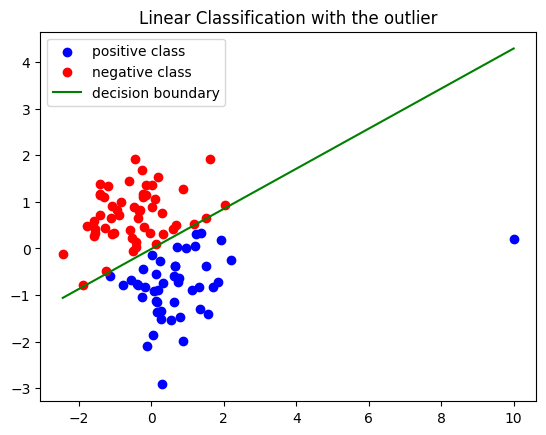

In [96]:
import numpy as np

def linclass_predict(w,X):
    # implement your linear classification algorithm here
    return sign(linreg_predict(w,X), 0)

df = pd.read_csv('Et1_Task3b.csv', header=0)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# adding an outlier point at x = 1, y = 0.2
X = np.append(X, [[10, 0.2]], axis=0)
y = np.append(y, 1)
w = linreg_weights(X,y)
predict = linclass_predict(w,X)

x_values = X[:, 0]  # select one feature for the x-axis
y_values = X[:, 1] 

plt.scatter(x_values[predict == 1], y_values[predict == 1], color='blue', label = 'positive class')
plt.scatter(x_values[predict == -1], y_values[predict == -1], color='red', label = 'negative class')


# Plot decision boundary
x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_values = -(w[0] + w[1]*x_values) / w[2]
plt.plot(x_values, y_values, 'g-', label='decision boundary')
plt.title("Linear Classification with the outlier")

plt.legend()

As we can clearly see the decision boundary has classified some of the blue points as red now due to the outlier. This means the Mean Square Error function is not ideal for the Linear Classification 

In [473]:
print("MSE", calc_class_error(w,X,y))


MSE 0.024166328282080703


You may add as many cells below as you require.

##  Describe and Explain
Describe the impact of the outlier on both models. Explain why logistic regression is less sensitive to the outlier. 

Provide your answer in this cell..

### Impact of Outlier on Linear Regression
<span style = "color:green">The outlier modifies the slope and the intercept of the regression line as shown above in favour of the outlier points when used along with the Mean Square Error function to alter the weights. These outlier points introduces bias in the model. If not regularized properly would lead to a biased model. They would also introduce variance there by reducing the generalization capability of the model. As we are trying to represent the relationship between the independent variable and the dependent variable with the Linear Regression, with addition of outliers, the model would learn incorrect relationship and thereby would not be a good fit for the data.</span>

### Impact of Outlier on Linear Classification
<span style = "color:green">Since we are trying to classify objects into 2 classes, addition of oulier would lead to incorrect plotting of decision boundary along with the outliers weight into consideration and thereby classifying data points incorrectly. These outliers would represent noise data, which leads the model to classify newer data points incorrectly.</span>

### Why Logistic Regression is less sensitive to outlier
<span style = "color:green">One of the key reasons for Logistic Regression to be adaptable to outlier is due to the loss function it uses. The logisitic loss function adds a penality to misclassified points logarithmically leading to very little influence by the outlier data points.
Another reason is its ability to from non-linear decision boundary which can better accommodate outlier data points. Another factor that accounts for this is the probabilistic nature of predictions proposed by logistic regression. This assigns lower probabilites to outlier data points when predicting the new data point.</span>


 # Reflection
 Once you have completed all tasks in this notebook and have studied all other materials for this E-tivity (resources, lectures and live sessions), answer the following questions.
<ol>
<li>Summarise your understanding of how the Hoeffding bound, the concept of 'shattering', break points and the growth function inform the VC bound for a binary classifier. Also discuss how this relates to the general rule of thumb in machine learning that one needs a number of data points at least equal to 10 times the VC bound.</li>
<li>Summarise your understanding of the approximation-generalisation trade-off in terms of complexity, bias and variance of a model, and the resulting under/overfitting given the available data. </li>
<li>Clearly describe the changes you have made based on your peers' work and feedback in the provided Reflection cell.</li>
    </ol>

## 1
Provide your answer in this cell..  
The Hoeffding bound gives us a bound for the deviation between the in-sample error and out-of-sample error by providing a statistical assurance on the accuracy we can obtain by assuming an error rate epsilon.  

The growth function is a representation of the maximum number of varying dichotomies that a hypothesis set can produce provided a set of points(N). For any hypothesis set, there exist a maximum of 2^N distinct dichotomies, from the observation that as N increases, the number of distinct dichotomies reduces.   

Shattering refers to the ability of the hypothesis set to perfectly classify each point in the data set in the context of binary classifiers. A hypothesis set has a VC dimension of atleast N for each incremental N value for which it can shatter the dataset.  

The maximum number of such points that the hypothesis can shatter is called as the breakpoint. If there exist a value of N for which the classfication cannot be done correctly for a given hypothesis set, then N - 1 would be VC dimension(dVC) for that hypothesis.  

If the dVC is less than infinite(as there exist a number of models for which this is the case) then we can say that the growth function can be represented as N^dVC + 1 rather than 2^N  

Using these concepts we can say that the VC bound gives a probilisitic guarantee that the difference between the in-sample and out-of-sample error would not exceed beyond the upper limit, taking into consideration the complexity of the model which is denoted by the VC dimension

The rule of thumb is that we need the number of data points greater that or equal to 10 times the VC dimension in order for the model to be considered as acceptable with respect to its predictions. Only then would the model be able to generalize the solution for any new points. This is done in order to create a balance of complexity of the model represented by VC dimension so that the model does not overfit or underfit the data. eg. with 10 data points a complex model would clearly overfit there by learning noise. However, with number of data > 10 times the VC bound this model can behave in such a way to generalize better.

## 2
Provide your answer in this cell..

For any model we need the Eout to be small. We obtain Eout from Average hypothesis and the difference from the real output which is denoted as bias, and the difference between the optimal hypothesis we observe from the training data, and the average hypothesis. This is reffered to as variance.  

The bias term tells us how close the average hypothesis can get to the real output function (ie. the error introduced by the approximation). For a simple model this value will be huge due to inflexibility of the model. Reducing the bias would lead to a more complex model. However, having a high value of bias would mean a simple model that would not be able to fit the given dataset to a hypothesis that is close to the actual function. This is known as underfitting  

The flexibility or adaptability of the model is denoted by the Variance. For a model with a higher value of Variance, the hypothesis set would be composed of a set of hypothesis that are widely different. This means the difference between the average hypthesis and the optimal hypothesis we observe from the training data would also grow as we increase the flexibilty of the hypothesis set.  

However, when the complexity of the model increases, the model becomes sensitive to outlier data points. ie. even for a small change in the weight of the model the output varies widely. Hence do not want a model that has a high value of complexity(very low bias)  

Hence we need to find a sweet spot where the bias is small enough and the variance is small enough by increasing the complexity of the model and at the same time not increasing the complexity so much that the difference between the optimal hypothesis we observe from the training data and the average hypothesis grows respectively. Hence the term trade-off  



## 3
Changed the logic for 3a using the train test split in order to define the fact that the prediction we use is for drawing the regression line which is shown in the first plotted figure with heading "Linear Regression line plotted with the predicted data points". This is then used to calculate the difference to the given datapoints to predict the error measure.

<hr style="border:2px solid gray">

# Appendix

## Demonstration of effect of outlier on logistic regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. You can use this code to compare the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure. Moreover, below code provides some good hints for plotting the decision boundary in task 3b :-).

Load data:

In [474]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [475]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.83

Extract weights from model:

In [476]:
w_lr = estimator.intercept_
w_lr=np.append(w_lr, estimator.coef_)
w_lr

array([ 0.0734753 ,  1.13198888, -1.608425  ])

Add outlier:

In [477]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [478]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.8118811881188119

Extract new weight vector from model:

In [479]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

array([ 0.09420734,  0.96672772, -1.03886315])

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

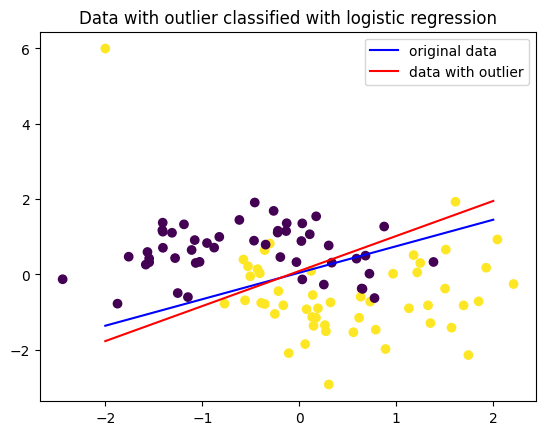

0.6237623762376238

In [480]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr[0]/w_lr[2]+w_lr[1]/w_lr[2]*2,-w_lr[0]/w_lr[2]-w_lr[1]/w_lr[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)

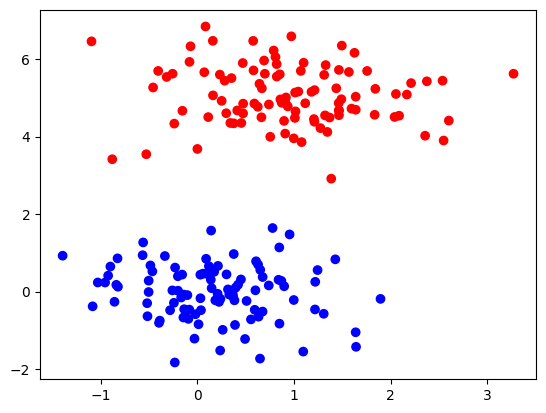

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Create class 1 data
np.random.seed(1)
class_1 = np.random.randn(100, 2) * 0.75 + np.array([0, 0])

# Create class 2 data
class_2 = np.random.randn(100, 2) * 0.75 + np.array([1, 5])

# Combine the data
X = np.vstack([class_1, class_2])
y = np.hstack([[-1]*100, [1]*100])

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.show()